In [19]:
!pip3 install pandas
!pip3 install keras

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 377 kB 166 kB/s eta 0:00:01
     |████████████████████████████████| 50 kB 6.6 MB/s eta 0:00:011
     |████████████████████████████████| 269 kB 586 kB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=45919 sha256=7f6f517acacd8acd5196bb10f02b4bd95fdb9e585bf37ecdd6324c42c84a30ad
  Stored in directory: /root/.cache/pip/wheels/e5/9d/ad/2ee53cf262cba1ffd8afe1487eef788ea3f260b7e6232a80fc
Successfully built pyyaml
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [70]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot as pyd
import keras
keras.utils.vis_utils.pydot = pyd
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [4]:
data = tf.keras.datasets.mnist.load_data(path = 'mnist.npz')

11493376/11490434 [==============================] - 3s 0us/step


In [5]:
(Xtrain, ytrain), (Xtest, ytest) = data

In [6]:
print("Shape of training points : {}".format(Xtrain.shape))
print("Shape of training labels : {}".format(ytrain.shape))
print("Number of training examples : {}".format(Xtrain.shape[0]))
print("Shape of testing points : {}".format(Xtest.shape))
print("Shape of testing labels : {}".format(ytest.shape))
print("Number of testing examples : {}".format(Xtest.shape[0]))

Shape of training points : (60000, 28, 28)
Shape of training labels : (60000,)
Number of training examples : 60000
Shape of testing points : (10000, 28, 28)
Shape of testing labels : (10000,)
Number of testing examples : 10000


# Visualizing the training data

Before building any model it's better we visualize the data as we can see that all the images are binarized invertedly and are of shape 28 $\times$ 28. So if we build a model on this and try to apply this model in some other problem then the image data of that problem should also be invertedly binarized

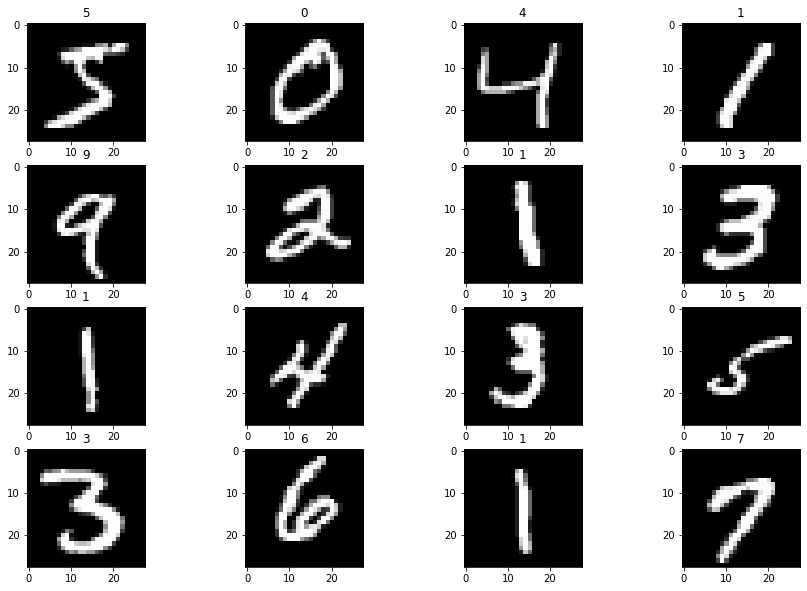

In [7]:
fig = plt.figure(figsize = (15, 10))
rows = 4
columns = 4
for i in range(1, rows*columns+1):
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title(ytrain[i - 1])
    plt.imshow(Xtrain[i-1], cmap='gray')
plt.show()

# Visualizing the Test Data


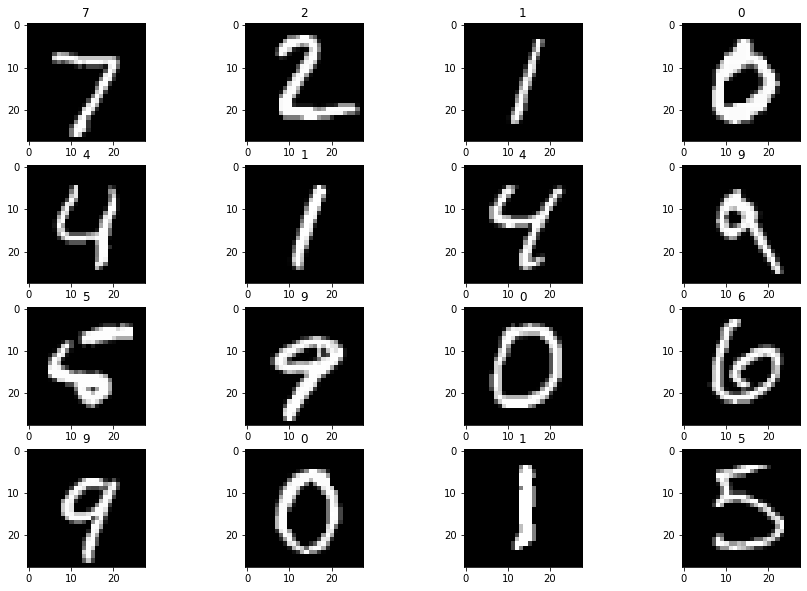

In [8]:
fig = plt.figure(figsize = (15, 10))
rows = 4
columns = 4
for i in range(1, rows*columns+1):
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title(ytest[i - 1])
    plt.imshow(Xtest[i-1], cmap='gray')
plt.show()

# Setting up the Model Architecture

In [35]:
def SimpleMnistModel(shape = (28, 28, 1), classes = 10):
    
    X_input = tf.keras.layers.Input(shape = shape)
    
    X = tf.keras.layers.Conv2D(64, (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0), name="conv_layer1")(X_input)
    X = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name = "max_pool_layer1")(X)
    X = tf.keras.layers.Conv2D(128, (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu', kernel_initializer= tf.keras.initializers.glorot_uniform(seed = 0), name="conv_layer2")(X)
    X = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name = "max_pool_layer2")(X)
    X = tf.keras.layers.Dropout(0.2, name ='dropout_layer1')(X)
    X = tf.keras.layers.Flatten(name='flatten_layer')(X)
    X = tf.keras.layers.Dense(2048, activation ='relu', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0), name = 'fc_layer1')(X)
    X = tf.keras.layers.Dense(1024, activation = 'relu', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0), name = 'fc_layer2')(X)
    X = tf.keras.layers.Dropout(0.2, name='dropout_layer2')(X)
    X = tf.keras.layers.Dense(classes, activation = 'softmax', kernel_initializer = tf.keras.initializers.glorot_uniform(seed = 0), name = 'output_layer')(X)
    
    model = tf.keras.models.Model(inputs = X_input, outputs = X, name = 'SimpleMNISTModel')
    return model

In [44]:
model = SimpleMnistModel()

In [45]:
model.summary()

Model: "SimpleMNISTModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_layer1 (Conv2D)         (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_layer1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_layer2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 2048)         

In [46]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
def one_hot_Y(y, classes = 10):
    one_hot = np.zeros((y.shape[0], classes))
    for i in range(y.shape[0]):
        one_hot[i, y[i]] = 1
    
    return one_hot

In [42]:
Xtrain = Xtrain / 255.
Xtest = Xtest / 255.
ytrain_onehot = one_hot_Y(ytrain)
ytest_onehot = one_hot_Y(ytest)
Xtrain_reshape = Xtrain.reshape((-1, 28, 28, 1 ))
Xtest_reshape = Xtest.reshape((-1, 28, 28, 1))
print("Shape of Xtrain : {}".format(Xtrain_reshape.shape))
print("Shape of Xtest : {}".format(Xtest_reshape.shape))
print("One Hot encoded Ytrain shape : {}".format(ytrain_onehot.shape))
print("One Hot encoded Ytest shape : {}".format(ytest_onehot.shape))

Shape of Xtrain : (60000, 28, 28, 1)
Shape of Xtest : (10000, 28, 28, 1)
One Hot encoded Ytrain shape : (60000, 10)
One Hot encoded Ytest shape : (10000, 10)


In [47]:
Xval_reshape , yval_reshape = Xtest_reshape[:5000], ytest_onehot[:5000]
history = model.fit(x=Xtrain_reshape, y=ytrain_onehot, batch_size=128, validation_data = (Xval_reshape, yval_reshape), epochs = 200)

Epoch 1/200
469/469 [==============================] - 10s 20ms/step - loss: 0.9933 - accuracy: 0.6438 - val_loss: 0.2544 - val_accuracy: 0.9216
Epoch 2/200
469/469 [==============================] - 9s 20ms/step - loss: 0.2448 - accuracy: 0.9231 - val_loss: 0.1672 - val_accuracy: 0.9458
Epoch 3/200
469/469 [==============================] - 9s 20ms/step - loss: 0.1796 - accuracy: 0.9426 - val_loss: 0.1419 - val_accuracy: 0.9504
Epoch 4/200
469/469 [==============================] - 9s 20ms/step - loss: 0.1473 - accuracy: 0.9530 - val_loss: 0.1100 - val_accuracy: 0.9618
Epoch 5/200
469/469 [==============================] - 9s 20ms/step - loss: 0.1260 - accuracy: 0.9594 - val_loss: 0.1053 - val_accuracy: 0.9662
Epoch 6/200
469/469 [==============================] - 9s 20ms/step - loss: 0.1077 - accuracy: 0.9650 - val_loss: 0.0871 - val_accuracy: 0.9714
Epoch 7/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0985 - accuracy: 0.9683 - val_loss: 0.0869 - val_accuracy

469/469 [==============================] - 9s 20ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0529 - val_accuracy: 0.9858
Epoch 58/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0190 - accuracy: 0.9934 - val_loss: 0.0501 - val_accuracy: 0.9844
Epoch 59/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0582 - val_accuracy: 0.9844
Epoch 60/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0426 - val_accuracy: 0.9866
Epoch 61/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0471 - val_accuracy: 0.9846
Epoch 62/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0512 - val_accuracy: 0.9854
Epoch 63/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0521 - val_accuracy: 0.983

469/469 [==============================] - 9s 20ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.0559 - val_accuracy: 0.9854
Epoch 114/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0564 - val_accuracy: 0.9850
Epoch 115/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0533 - val_accuracy: 0.9864
Epoch 116/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0512 - val_accuracy: 0.9860
Epoch 117/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0544 - val_accuracy: 0.9842
Epoch 118/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0519 - val_accuracy: 0.9854
Epoch 119/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 0.0559 - val_accuracy:

469/469 [==============================] - 10s 20ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0715 - val_accuracy: 0.9856
Epoch 170/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0630 - val_accuracy: 0.9840
Epoch 171/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0742 - val_accuracy: 0.9822
Epoch 172/200
469/469 [==============================] - 10s 20ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0665 - val_accuracy: 0.9834
Epoch 173/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0601 - val_accuracy: 0.9846
Epoch 174/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0631 - val_accuracy: 0.9840
Epoch 175/200
469/469 [==============================] - 9s 20ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0611 - val_accurac

In [48]:
history.history

{'loss': [0.9933039546012878,
  0.24477677047252655,
  0.17960339784622192,
  0.14725302159786224,
  0.12598025798797607,
  0.10768584907054901,
  0.0984611064195633,
  0.0899742990732193,
  0.08399487286806107,
  0.07866663485765457,
  0.07115276157855988,
  0.06807997822761536,
  0.06502296775579453,
  0.06306431442499161,
  0.05680319666862488,
  0.05549297854304314,
  0.05417615547776222,
  0.05102009326219559,
  0.050194885581731796,
  0.04762732982635498,
  0.04579566419124603,
  0.04342545196413994,
  0.03986947610974312,
  0.03952457755804062,
  0.03646818548440933,
  0.03956541791558266,
  0.03609035164117813,
  0.034784674644470215,
  0.03384851664304733,
  0.03235720470547676,
  0.03169289231300354,
  0.03068658523261547,
  0.030206061899662018,
  0.029370412230491638,
  0.030385445803403854,
  0.028066294267773628,
  0.026765838265419006,
  0.028222637251019478,
  0.02606607787311077,
  0.026531152427196503,
  0.02380770817399025,
  0.02504304051399231,
  0.0236714165657758

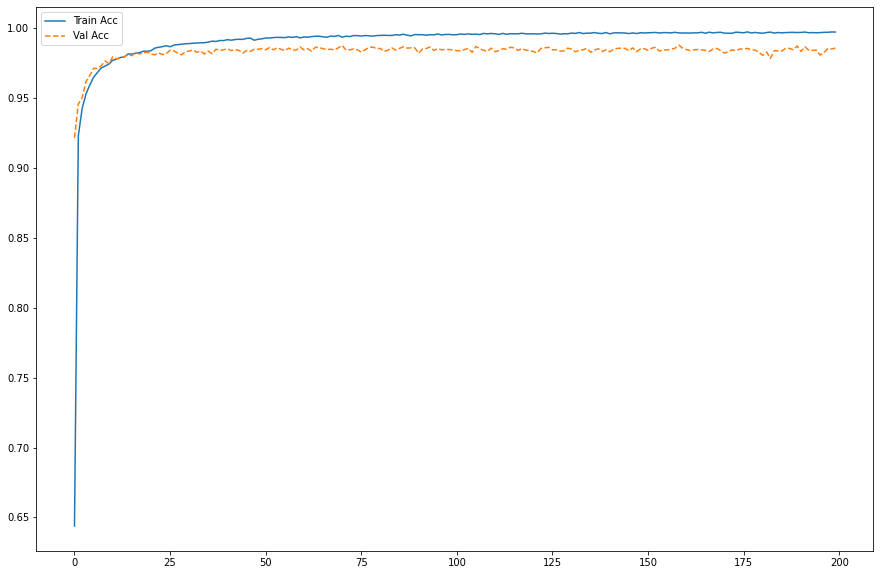

In [50]:
plt.figure(figsize = (15, 10))
plt.plot(history.history["accuracy"], label='Train Acc')
plt.plot(history.history["val_accuracy"], '--', label = 'Val Acc')
plt.legend()
plt.show()

In [54]:
train_error = np.asarray(list(map(lambda x: 1 - x, history.history["accuracy"])))
val_error = np.asarray(list(map(lambda x: 1 - x, history.history["val_accuracy"])))
print("Average Train Error : {:.4f}".format(np.mean(train_error)))
print("Average Val Error : {:.4f}".format(np.mean(val_error)))

Average Train Error : 0.0092
Average Val Error : 0.0168


In [72]:
!pip3 install --no-deps tensorflowjs
!pip3 install --upgrade tensorflow-hub
# !pip3 install pydotplus
# !pip3 install graphviz

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.6/dist-packages (0.8.0)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [61]:
import tensorflowjs as tfjs
os.makedirs("./tfjsmodels/", exist_ok = True)
tfjs.converters.save_keras_model(model, "./tfjsmodels/")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
